#### __VFDB & Diamond__

__Docs:__

https://github.com/bbuchfink/diamond/wiki

In [4]:
# Libraries and shortcuts

import polars as pl
import pandas as pd
import os
import matplotlib.pyplot as plt

dmnd = "/home/npilquinao/BEM-ISP/group_storage/diamond/"

VFDB = pd.read_csv(dmnd + "VFDB_structure_file", sep='\t')

#### __Diamond-blastx__

__Database file (.dmnd) info__

In [1]:
%%bash

diamond dbinfo \
    --threads 40 \
    --db /home/npilquinao/BEM-ISP/group_storage/VFDB_PA_16-04-24/VFDB_structure_file.dmnd

diamond v2.1.9.163 (C) Max Planck Society for the Advancement of Science, Benjamin Buchfink, University of Tuebingen
Documentation, support and updates available at http://www.diamondsearch.org
Please cite: http://dx.doi.org/10.1038/s41592-021-01101-x Nature Methods (2021)



          Database type  Diamond database
Database format version  3
          Diamond build  163
              Sequences  27982
                Letters  13298383


__Diamond-blastx flags__

In [4]:
!diamond blastx

diamond v2.1.9.163 (C) Max Planck Society for the Advancement of Science, Benjamin Buchfink, University of Tuebingen
Documentation, support and updates available at http://www.diamondsearch.org
Please cite: http://dx.doi.org/10.1038/s41592-021-01101-x Nature Methods (2021)

Options:
--threads                number of CPU threads
--verbose                verbose console output
--log                    enable debug log
--quiet                  disable console output
--tmpdir                 directory for temporary files
--db                     database file
--out                    output file
--header                 Use header lines in tabular output format (0/simple/verbose).
--comp-based-stats       composition based statistics mode (0-4)
--masking                masking algorithm (none, seg, tantan=default)
--soft-masking           soft masking (none=default, seg, tantan)
--evalue                 maximum e-value to report alignments (default=0.001)
--motif-masking          softmask

__Virulence factors reference__

In [30]:
import polars as pl

VFDB = pl.read_csv('/home/npilquinao/BEM-ISP/group_storage/VFDB_PA_16-04-24/VFDB_structure_file',
                   separator='\t')
print(f"Reference has {VFDB.shape[0]} rows")
display(VFDB.head(4))

Reference has 27982 rows


VFG,Virulence_Factor,Virulence_Factor_Category,Pathogen_Species
str,str,str,str
"""VFG000001""","""FHA-VF0025""","""Adherence-VFC0001""","""Bordetella_pertussis_Tohama_I"""
"""VFG000002""","""Pertactin-VF0027""","""Adherence-VFC0001""","""Bordetella_pertussis_Tohama_I"""
"""VFG000003""","""Fimbriae-VF0031""","""Adherence-VFC0001""","""Bordetella_pertussis_Tohama_I"""
"""VFG000004""","""Fimbriae-VF0031""","""Adherence-VFC0001""","""Bordetella_pertussis_Tohama_I"""


__Test (VA1046)__

In [ ]:
%%bash

d=/home/npilquinao/BEM-ISP/group_storage/diamond
fasta=/home/npilquinao/BEM-ISP/group_storage/hybracter/assembly_output/FINAL_OUTPUT/N12s_genomes

diamond blastx\
    --threads 65 \
    --verbose \
    --header simple \
    --db $d/VFDB_structure_file.dmnd \
    --query $fasta/VA1046_final.fasta\
    --out $d/VA1046_blastx_TEST.tsv \
    --outfmt 6 \
        qseqid qlen qstart qend \
        sseqid slen \
        pident length ppos bitscore score evalue

__Raw test results__

In [8]:
import polars as pl

blastx = pl.read_csv('/home/npilquinao/BEM-ISP/group_storage/diamond/VA61_blastx_TEST.tsv',
                          separator='\t',
                          has_header=True)
print("Blastx results")
print("     n° hits: ", blastx.shape[0])
display(blastx.head(8))

Blastx results
     n° hits:  58


qseqid,qlen,qstart,qend,qcovhsp,sseqid,slen,sstart,send,scovhsp,length,nident,pident,evalue,bitscore
str,i64,i64,i64,f64,str,i64,i64,i64,f64,i64,i64,f64,f64,f64
"""cVA61""",4887737,3330142,3333783,0.1,"""VFG044336""",1214,1,1214,100.0,1214,1146,94.4,0.0,2179.0
"""cVA61""",4887737,3330142,3333783,0.1,"""VFG048551""",1214,1,1214,100.0,1214,1143,94.2,0.0,2172.0
"""cVA61""",4887737,3330142,3333786,0.1,"""VFG012509""",1219,1,1216,99.8,1216,1103,90.7,0.0,2096.0
"""cVA61""",4887737,3330142,3333786,0.1,"""VFG033929""",1219,1,1216,99.8,1216,1102,90.6,0.0,2092.0
"""cVA61""",4887737,3330142,3333786,0.1,"""VFG012510""",1219,1,1216,99.8,1216,1101,90.5,0.0,2092.0
"""cVA61""",4887737,3330142,3333786,0.1,"""VFG012511""",1219,1,1216,99.8,1216,1101,90.5,0.0,2090.0
"""cVA61""",4887737,3330142,3333786,0.1,"""VFG012512""",1219,1,1216,99.8,1216,1101,90.5,0.0,2090.0
"""cVA61""",4887737,3330142,3333786,0.1,"""VFG012971""",1219,1,1216,99.8,1216,1101,90.5,0.0,2088.0


__Run blastx in all samples__

In [ ]:
%%bash

D=/home/npilquinao/BEM-ISP/group_storage
diamond=$D/diamond
fasta=$D/hybracter/assembly_output/FINAL_OUTPUT/N12s_genomes

for sample in $fasta/*.fasta; do

    name=$(basename "$sample" _final.fasta)

    diamond blastx\
        --threads 68 \
        --header simple \
        --db $diamond/VFDB_structure_file.dmnd \
        --query "$sample"\
        --out "$diamond/output/${name}_blastx.tsv" \
        --outfmt 6 \
            qseqid qlen qstart qend \
            sseqid slen \
            pident length ppos bitscore score evalue 
done

__Combine all in one .tsv__

In [ ]:
%%bash

output=/home/npilquinao/BEM-ISP/group_storage/diamond/output/filtering

awk 'NR==1{print; next} FNR > 1' $output/*.tsv \
    > $output/N12s_VFDB.tsv

#### __Matchs filtering__

* Using Python to select the best ORF for virulence factor

##### __General filter (> 1000pb)__

__Enfoque:__

Si el valor absoluto de la diferencia entre 2 hits es menor a 1000 unidades (pb), entonces tales hits corresponden a la misma región funcional del genoma (redundancia) y se agrupan. Luego, para cada grupo se selecciona el hit con el mayor bitscore y se asume como el factor de virulencia correspondiente.

__Notas:__

- Si hay más de un hit con el valor de bitscore mayor (valor repetido), solo se mantiene 1 fila. Sin embargo, observé que los valores de VFG son diferentes en estos casos, pese a que los descriptivos del alineamiento (%ident, score, lenght) sean los mismos. Cual hay que escoger? Alguno es más correcto o solo es redundante la base?

- Un valor de 1000 unidades parece ser una referencia útil para diferenciar genes cromosomales independientes. Sin embargo, el largo de los genes de plásmidos en la base de datos va de 200 a 800 aprox. Entonces, puede significar esto que la diferencia de 1000 unidades en coordenadas para genes plasmidiales es demasiado grande? Si fuera así, el algoritmo estaría omitiendo factores de virulencia al agruparlos mal. Quizas un enfoque util para esto puede ser sacar un promedio, o utilizar el valor de la media para el largo de los genes en VFDB de la muestra en cuestion, y luego usar ese valor como referencia para los grupos.

In [53]:
import pandas as pd

blastx = pd.read_csv('/home/npilquinao/BEM-ISP/group_storage/diamond/output/VA418_blastx.tsv', sep='\t')
VFDB = pd.read_csv('/home/npilquinao/BEM-ISP/group_storage/diamond/VFDB_structure_file', sep='\t')

blastx = blastx.sort_values('qstart')

blastx['ORF'] = 'A'

for i in range(1, len(blastx)):
    if abs(blastx.iloc[i]['qstart'] - blastx.iloc[i-1]['qstart']) < 1000:
        blastx.iloc[i, blastx.columns.get_loc('ORF')] = blastx.iloc[i-1]['ORF']
    else:
        blastx.iloc[i, blastx.columns.get_loc('ORF')] = chr(ord(blastx.iloc[i-1]['ORF']) + 1)

max_bitscore_per_orf = blastx.groupby('ORF')['bitscore'].transform('max')

blastx_filtered = blastx[blastx['bitscore'] == max_bitscore_per_orf]
blastx_filtered = blastx_filtered.sort_values('qseqid')
blastx_filtered.rename(columns={'sseqid': 'VFG'}, inplace=True)

# Remove duplicates #

blastx_filtered = blastx_filtered.drop_duplicates(subset=['bitscore'])

VA61 = pd.merge(blastx_filtered, VFDB, on='VFG', how='inner')
VA61.drop('ORF', axis=1, inplace=True)

display(blastx_filtered.head(20))
print(f"Number of hits: {VA61.shape[0]}")
display(VA61.head(20))

,qseqid,qstart,qend,VFG,slen,length,pident,ppos,bitscore,score,evalue,ORF
0,cVA418,1900058,1890570,VFG000362,3163,3163,99.7,99.8,6293.0,16326,0.000000e+00,G
24,cVA418,1906253,1900149,VFG012549,2035,2035,99.7,99.8,4124.0,10696,0.000000e+00,H
73,pVA418-110,57382,57786,VFG040800,200,136,39.0,58.1,84.3,207,1.040000e-16,D
51,pVA418-110,63335,62442,VFG012636,309,307,46.3,65.1,225.0,573,3.040000e-64,E
50,pVA418-110,91045,89270,VFG001269,712,599,29.0,51.8,244.0,623,2.070000e-66,F
25,pVA418-180,21100,22464,VFG034652,460,455,72.3,85.1,632.0,1630,1.820000e-203,B
41,pVA418-180,28471,30504,VFG031407,770,679,44.8,61.6,494.0,1271,6.460000e-151,C
75,pVA418-56,13631,16039,VFG011097,824,820,32.4,51.7,416.0,1068,7.340000e-124,A


Number of hits: 8


,qseqid,qstart,qend,VFG,slen,length,pident,ppos,bitscore,score,evalue,Virulence_Factor,Virulence_Factor_Category,Pathogen_Species
0,cVA418,1900058,1890570,VFG000362,3163,3163,99.7,99.8,6293.0,16326,0.000000e+00,Yersiniabactin-VF0136,Nutritional_Metabolic_factor-VFC0272,Yersinia_pestis_CO92
1,cVA418,1906253,1900149,VFG012549,2035,2035,99.7,99.8,4124.0,10696,0.000000e+00,Yersiniabactin_siderophore-VF1115,Nutritional_Metabolic_factor-VFC0272,Escherichia_coli_UTI89
2,pVA418-110,57382,57786,VFG040800,200,136,39.0,58.1,84.3,207,1.040000e-16,Pld-VF0491,Exotoxin-VFC0235,Rickettsia_rickettsii_Hlp#2
3,pVA418-110,63335,62442,VFG012636,309,307,46.3,65.1,225.0,573,3.040000e-64,TTSS-VF0118,Effector_delivery_system-VFC0086,Shigella_flexneri_2a_str_301
4,pVA418-110,91045,89270,VFG001269,712,599,29.0,51.8,244.0,623,2.070000e-66,Cya-VF0028,Exotoxin-VFC0235,Bordetella_pertussis_Tohama_I
5,pVA418-180,21100,22464,VFG034652,460,455,72.3,85.1,632.0,1630,1.820000e-203,Ibes-VF0237,Invasion-VFC0083,Escherichia_coli_O157_H7_str_EDL933
6,pVA418-180,28471,30504,VFG031407,770,679,44.8,61.6,494.0,1271,6.460000e-151,Copper_exporter-VF0849,Nutritional_Metabolic_factor-VFC0272,Mycobacterium_canettii_CIPT_140070010
7,pVA418-56,13631,16039,VFG011097,824,820,32.4,51.7,416.0,1068,7.340000e-124,Ptl_type_IV_secretion_system-VF0686,Effector_delivery_system-VFC0086,Bordetella_parapertussis_12822


##### __Diff filter (structures)__

__Enfoque:__

Se utiliza la misma base de filtrado anterior: la agrupación de hits en base al valor absoluto de la diferencia de sus coordenadas iniciales según un valor arbitrario, pero se agrega una separación por grupos superiores según cada estructura independiente del genoma, es decir, se realiza el filtrado de manera diferencial para el cromosoma y para cada plásmido. Esto permite ajustar el umbral arbitrario según la naturaleza de sus componentes<sup>(1)</sup>. El valor de umbral mínimo usado en cada comparación es el promedio de las longitudes de los genes encontrados en la base de datos<sup>(2)</sup>.

__Notas:__

(1) Decidí implementar esta separación entre plásmidos y cromosoma por la gran diferencia entre los largos de los genes plasmidiales vs cromosomales. Usar una distancia de 1000 pb tiene sentido pensando en lo grande que son los genes cromosomales, pero dentro de los plásmidos hay alineamientos con genes anotados que no superan las 200 pb. Desconozco que tan probable sea, pero usando una separación de 1000 nucleótidos entre ese tipo de genes puede ser que se este asumiendo como el mismo factor (mismo grupo en el código), un gen repetido que este contiguo. Es decir, 2 copias del mismo gen, separadas por pocas bases (nose, 10 bases). Ni idea si esto es posible, pero no conozco ninguna razon para que no ocurra

(2) Para poder ajustar bien el umbral en cada caso, pienso que se debe establecer como longitud mínima entre la separación de las coordenadas de inicio de 2 genes, el largo del gen. En el caso hipotetico de 2 genes exactamente contiguos, obligatoriamente tienen que estar separados por su longitud (por razones funcionales). Entonces, ese es el valor mínimo elegido para agruparlos o no.

* Igual es importante destacar que las coordenadas de los plásmidos y del cromosoma no son las mismas ni se corresponden (son referencias independientes), así que se puede omitir gran parte de mi desordenada justificación en (1)


In [6]:
import pandas as pd

blastx = pd.read_csv('/home/npilquinao/BEM-ISP/group_storage/diamond/VA1046_blastx_TEST.tsv', sep='\t')
VFDB = pd.read_csv('/home/npilquinao/BEM-ISP/group_storage/diamond/VFDB_structure_file', sep='\t')

blastx = blastx.sort_values('qstart')

blastx['ORF'] = ''

for qlen_value, group in blastx.groupby('qlen'):
    group = group.sort_values('qstart')
    group['ORF'] = 'A'
    
    for i in range(1, len(group)):
        if abs(group.iloc[i]['qstart'] - group.iloc[i-1]['qstart']) < 1000:
            group.iloc[i, group.columns.get_loc('ORF')] = group.iloc[i-1]['ORF']
        else:
            group.iloc[i, group.columns.get_loc('ORF')] = chr(ord(group.iloc[i-1]['ORF']) + 1)
    
    prefix = chr(96 + list(blastx['qlen'].unique()).index(qlen_value) + 1)
    group['ORF'] = prefix + group['ORF']
    blastx.loc[group.index, 'ORF'] = group['ORF']

max_bitscore_per_orf = blastx.groupby('ORF')['bitscore'].transform('max')
blastx_filtered = blastx[blastx['bitscore'] == max_bitscore_per_orf]
blastx_filtered = blastx_filtered.drop_duplicates(subset=['bitscore'])

blastx_filtered = blastx_filtered.sort_values('qseqid')
blastx_filtered.rename(columns={'sseqid': 'VFG'}, inplace=True)

TEST = pd.merge(blastx_filtered, VFDB, on='VFG', how='inner')

# _________________________________________________________________ #

print(f"Number of hits: {TEST.shape[0]}")
display(TEST.head(20))

Number of hits: 8


,qseqid,qlen,qstart,qend,VFG,slen,pident,length,ppos,bitscore,score,evalue,ORF,Virulence_Factor,Virulence_Factor_Category,Pathogen_Species
0,cVA1046,5544867,2035873,2026385,VFG000362,3163,99.7,3163,99.8,6292.0,16324,0.000000e+00,dA,Yersiniabactin-VF0136,Nutritional_Metabolic_factor-VFC0272,Yersinia_pestis_CO92
1,cVA1046,5544867,2042068,2035964,VFG000363,2035,99.7,2035,99.8,4120.0,10684,0.000000e+00,dB,Yersiniabactin-VF0136,Nutritional_Metabolic_factor-VFC0272,Yersinia_pestis_CO92
2,pVA1046-199,199031,19900,21264,VFG034652,460,72.3,455,85.1,632.0,1630,2.010000e-203,cA,Ibes-VF0237,Invasion-VFC0083,Escherichia_coli_O157_H7_str_EDL933
3,pVA1046-199,199031,27265,29298,VFG031407,770,44.6,679,61.6,491.0,1265,4.480000e-150,cB,Copper_exporter-VF0849,Nutritional_Metabolic_factor-VFC0272,Mycobacterium_canettii_CIPT_140070010
4,pVA1046-41,41889,10285,11178,VFG012636,309,45.9,305,64.9,224.0,570,2.880000e-64,aA,TTSS-VF0118,Effector_delivery_system-VFC0086,Shigella_flexneri_2a_str_301
5,pVA1046-41,41889,21727,20837,VFG000088,620,35.4,297,55.2,132.0,331,2.720000e-30,aB,TCP-VF0126,Adherence-VFC0001,Vibrio_cholerae_O1_biovar_El_Tor_str_N16961
6,pVA1046-46,46161,12684,11689,VFG011116,339,34.8,339,53.4,188.0,477,2.000000e-51,bA,Ptl_type_IV_secretion_system-VF0686,Effector_delivery_system-VFC0086,Bordetella_bronchiseptica_RB50
7,pVA1046-46,46161,20495,18087,VFG011097,824,32.4,820,51.7,416.0,1068,5.970000e-124,bB,Ptl_type_IV_secretion_system-VF0686,Effector_delivery_system-VFC0086,Bordetella_parapertussis_12822


__* Notese que se estaban omitiendo 2 factores de virulencia__

##### __Diff filter (structures + average value)__

In [8]:
import pandas as pd

blastx = pd.read_csv('/home/npilquinao/BEM-ISP/group_storage/diamond/VA1046_blastx_TEST.tsv', sep='\t')
VFDB = pd.read_csv('/home/npilquinao/BEM-ISP/group_storage/diamond/VFDB_structure_file', sep='\t')

blastx = blastx.sort_values('qstart')

blastx['ORF'] = ''

for qlen_value, group in blastx.groupby('qlen'):
    group = group.sort_values('qstart')
    group['ORF'] = 'A'
    
    for i in range(1, len(group)):

        avg_slen = (group.iloc[i]['slen'] + group.iloc[i-1]['slen']) / 2
        
        if abs(group.iloc[i]['qstart'] - group.iloc[i-1]['qstart']) < avg_slen:
            group.iloc[i, group.columns.get_loc('ORF')] = group.iloc[i-1]['ORF']
        else:
            group.iloc[i, group.columns.get_loc('ORF')] = chr(ord(group.iloc[i-1]['ORF']) + 1)
    
    prefix = chr(96 + list(blastx['qlen'].unique()).index(qlen_value) + 1)
    group['ORF'] = prefix + group['ORF']
    blastx.loc[group.index, 'ORF'] = group['ORF']

max_bitscore_per_orf = blastx.groupby('ORF')['bitscore'].transform('max')
blastx_filtered = blastx[blastx['bitscore'] == max_bitscore_per_orf]
blastx_filtered = blastx_filtered.drop_duplicates(subset=['bitscore'])

blastx_filtered = blastx_filtered.sort_values('qseqid')
blastx_filtered.rename(columns={'sseqid': 'VFG'}, inplace=True)

TEST = pd.merge(blastx_filtered, VFDB, on='VFG', how='inner')

# _________________________________________________________________ #

print(f"Number of hits: {TEST.shape[0]}")
display(TEST.head(20))

Number of hits: 8


,qseqid,qlen,qstart,qend,VFG,slen,pident,length,ppos,bitscore,score,evalue,ORF,Virulence_Factor,Virulence_Factor_Category,Pathogen_Species
0,cVA1046,5544867,2035873,2026385,VFG000362,3163,99.7,3163,99.8,6292.0,16324,0.000000e+00,dA,Yersiniabactin-VF0136,Nutritional_Metabolic_factor-VFC0272,Yersinia_pestis_CO92
1,cVA1046,5544867,2042068,2035964,VFG000363,2035,99.7,2035,99.8,4120.0,10684,0.000000e+00,dB,Yersiniabactin-VF0136,Nutritional_Metabolic_factor-VFC0272,Yersinia_pestis_CO92
2,pVA1046-199,199031,19900,21264,VFG034652,460,72.3,455,85.1,632.0,1630,2.010000e-203,cA,Ibes-VF0237,Invasion-VFC0083,Escherichia_coli_O157_H7_str_EDL933
3,pVA1046-199,199031,27265,29298,VFG031407,770,44.6,679,61.6,491.0,1265,4.480000e-150,cB,Copper_exporter-VF0849,Nutritional_Metabolic_factor-VFC0272,Mycobacterium_canettii_CIPT_140070010
4,pVA1046-41,41889,10285,11178,VFG012636,309,45.9,305,64.9,224.0,570,2.880000e-64,aA,TTSS-VF0118,Effector_delivery_system-VFC0086,Shigella_flexneri_2a_str_301
5,pVA1046-41,41889,21727,20837,VFG000088,620,35.4,297,55.2,132.0,331,2.720000e-30,aB,TCP-VF0126,Adherence-VFC0001,Vibrio_cholerae_O1_biovar_El_Tor_str_N16961
6,pVA1046-46,46161,12684,11689,VFG011116,339,34.8,339,53.4,188.0,477,2.000000e-51,bA,Ptl_type_IV_secretion_system-VF0686,Effector_delivery_system-VFC0086,Bordetella_bronchiseptica_RB50
7,pVA1046-46,46161,20495,18087,VFG011097,824,32.4,820,51.7,416.0,1068,5.970000e-124,bB,Ptl_type_IV_secretion_system-VF0686,Effector_delivery_system-VFC0086,Bordetella_parapertussis_12822


##### __Diff filter (structures + max value)__

* Estaba usando el promedio de los valores de longitud del gen para las comparaciones y la agrupación, pero esto me parecía problemático en el caso de comparar genes de ORF diferente que presenten tamaños muy distintos. El promedio parece un buen indicador, pero la verdad es que  __la distancia mínima que tiene que existir entre los puntos de inicio de 2 genes diferentes, es la longitud del gen más grande.__

In [9]:
# Usando el valor maximo

import  as pd

blastx = pd.read_csv('/home/npilquinao/BEM-ISP/group_storage/diamond/VA1046_blastx_TEST.tsv', sep='\t')
VFDB = pd.read_csv('/home/npilquinao/BEM-ISP/group_storage/diamond/VFDB_structure_file', sep='\t')

blastx = blastx.sort_values('qstart')

blastx['ORF'] = ''

for qlen_value, group in blastx.groupby('qlen'):
    group = group.sort_values('qstart')
    group['ORF'] = 'A'
    
    for i in range(1, len(group)):

        max_slen = max(group.iloc[i]['slen'], group.iloc[i-1]['slen'])
        
        if abs(group.iloc[i]['qstart'] - group.iloc[i-1]['qstart']) < max_slen:
            group.iloc[i, group.columns.get_loc('ORF')] = group.iloc[i-1]['ORF']
        else:
            group.iloc[i, group.columns.get_loc('ORF')] = chr(ord(group.iloc[i-1]['ORF']) + 1)
    
    prefix = chr(96 + list(blastx['qlen'].unique()).index(qlen_value) + 1)
    group['ORF'] = prefix + group['ORF']
    blastx.loc[group.index, 'ORF'] = group['ORF']

max_bitscore_per_orf = blastx.groupby('ORF')['bitscore'].transform('max')
blastx_filtered = blastx[blastx['bitscore'] == max_bitscore_per_orf]
blastx_filtered = blastx_filtered.drop_duplicates(subset=['bitscore'])

blastx_filtered = blastx_filtered.sort_values('qseqid')
blastx_filtered.rename(columns={'sseqid': 'VFG'}, inplace=True)

TEST = pd.merge(blastx_filtered, VFDB, on='VFG', how='inner')

# _________________________________________________________________ #

print(f"Number of hits: {TEST.shape[0]}")
display(TEST.head(20))

Number of hits: 8


,qseqid,qlen,qstart,qend,VFG,slen,pident,length,ppos,bitscore,score,evalue,ORF,Virulence_Factor,Virulence_Factor_Category,Pathogen_Species
0,cVA1046,5544867,2035873,2026385,VFG000362,3163,99.7,3163,99.8,6292.0,16324,0.000000e+00,dA,Yersiniabactin-VF0136,Nutritional_Metabolic_factor-VFC0272,Yersinia_pestis_CO92
1,cVA1046,5544867,2042068,2035964,VFG000363,2035,99.7,2035,99.8,4120.0,10684,0.000000e+00,dB,Yersiniabactin-VF0136,Nutritional_Metabolic_factor-VFC0272,Yersinia_pestis_CO92
2,pVA1046-199,199031,19900,21264,VFG034652,460,72.3,455,85.1,632.0,1630,2.010000e-203,cA,Ibes-VF0237,Invasion-VFC0083,Escherichia_coli_O157_H7_str_EDL933
3,pVA1046-199,199031,27265,29298,VFG031407,770,44.6,679,61.6,491.0,1265,4.480000e-150,cB,Copper_exporter-VF0849,Nutritional_Metabolic_factor-VFC0272,Mycobacterium_canettii_CIPT_140070010
4,pVA1046-41,41889,10285,11178,VFG012636,309,45.9,305,64.9,224.0,570,2.880000e-64,aA,TTSS-VF0118,Effector_delivery_system-VFC0086,Shigella_flexneri_2a_str_301
5,pVA1046-41,41889,21727,20837,VFG000088,620,35.4,297,55.2,132.0,331,2.720000e-30,aB,TCP-VF0126,Adherence-VFC0001,Vibrio_cholerae_O1_biovar_El_Tor_str_N16961
6,pVA1046-46,46161,12684,11689,VFG011116,339,34.8,339,53.4,188.0,477,2.000000e-51,bA,Ptl_type_IV_secretion_system-VF0686,Effector_delivery_system-VFC0086,Bordetella_bronchiseptica_RB50
7,pVA1046-46,46161,20495,18087,VFG011097,824,32.4,820,51.7,416.0,1068,5.970000e-124,bB,Ptl_type_IV_secretion_system-VF0686,Effector_delivery_system-VFC0086,Bordetella_parapertussis_12822


##### __Diff filter 2.0 (structures + no-direction genes + 15% overlap)__

__Notas:__

* El enfoque de los filtros anteriores no abarca todos los casos posibles de orientación y posición de los ORF. Para solucionar esto, se estandariza la dirección de los genes, eliminando las diferencias en sentido (que hacen más compleja la comparación). Con todos los genes en la misma orientación, se ordenan los valores de menor a mayor para asegurar que la resta siempre sea de elementos en el mismo orden (siempre un gen posterior, en coordenadas, menos un gen anterior). Respetando estas condiciones, la diferencia entre la coordenada de inicio de un gen posterior y la coordenada final de un gen anterior va a ser negativa o nula si los elementos están sobrepuestos, y positiva si son independientes.

* Para considerar la posibilidad de que exista un codon de inicio del gen posterior en la región final del gen anterior, se acepta un sobrelapamiento en algún porcentaje del largo del gen anterior.

In [15]:
blastx = pd.read_csv(dmnd + "VA1046_blastx_TEST.tsv", sep='\t')

####################

overlap = 0

####################

for index, row in blastx.iterrows():
    if row['qstart'] > row['qend']:
        blastx.at[index, 'qstart'], blastx.at[index, 'qend'] = row['qend'], row['qstart']

blastx['ORF'] = ''

for qlen_value, group in blastx.groupby('qlen'):

    group = group.sort_values('qstart', ascending=True)

    group['ORF'] = 'A'
    
    for i in range(1, len(group)):

        if overlap == 0:
            per_cent = 1
        else:
            per_cent = (group.iloc[i-1]["slen"] * overlap)*(-1)
    
        if (group.iloc[i]['qstart'] - group.iloc[i-1]['qend']) < per_cent:
            group.iloc[i, group.columns.get_loc('ORF')] = group.iloc[i-1]['ORF']
        else:
            group.iloc[i, group.columns.get_loc('ORF')] = chr(ord(group.iloc[i-1]['ORF']) + 1)

    prefix = chr(96 + list(blastx['qlen'].unique()).index(qlen_value) + 1)
    group['ORF'] = prefix + group['ORF']
    blastx.loc[group.index, 'ORF'] = group['ORF']

max_bitscore_per_orf = blastx.groupby('ORF')['bitscore'].transform('max')
blastx_filtered = blastx[blastx['bitscore'] == max_bitscore_per_orf]
blastx_filtered = blastx_filtered.drop_duplicates(subset=['bitscore'])

blastx_filtered = blastx_filtered.sort_values('qseqid')
blastx_filtered.rename(columns={'sseqid': 'VFG'}, inplace=True)

TEST = pd.merge(blastx_filtered, VFDB, on='VFG', how='inner')

print(f"Number of hits: {TEST.shape[0]}")
display(TEST.head(15))

Number of hits: 8


,qseqid,qlen,qstart,qend,VFG,slen,pident,length,ppos,bitscore,score,evalue,ORF,Virulence_Factor,Virulence_Factor_Category,Pathogen_Species
0,cVA1046,5544867,2026385,2035873,VFG000362,3163,99.7,3163,99.8,6292.0,16324,0.000000e+00,aA,Yersiniabactin-VF0136,Nutritional_Metabolic_factor-VFC0272,Yersinia_pestis_CO92
1,cVA1046,5544867,2035964,2042068,VFG000363,2035,99.7,2035,99.8,4120.0,10684,0.000000e+00,aB,Yersiniabactin-VF0136,Nutritional_Metabolic_factor-VFC0272,Yersinia_pestis_CO92
2,pVA1046-199,199031,19900,21264,VFG034652,460,72.3,455,85.1,632.0,1630,2.010000e-203,bA,Ibes-VF0237,Invasion-VFC0083,Escherichia_coli_O157_H7_str_EDL933
3,pVA1046-199,199031,27265,29298,VFG031407,770,44.6,679,61.6,491.0,1265,4.480000e-150,bB,Copper_exporter-VF0849,Nutritional_Metabolic_factor-VFC0272,Mycobacterium_canettii_CIPT_140070010
4,pVA1046-41,41889,10285,11178,VFG012636,309,45.9,305,64.9,224.0,570,2.880000e-64,dA,TTSS-VF0118,Effector_delivery_system-VFC0086,Shigella_flexneri_2a_str_301
5,pVA1046-41,41889,20837,21727,VFG000088,620,35.4,297,55.2,132.0,331,2.720000e-30,dB,TCP-VF0126,Adherence-VFC0001,Vibrio_cholerae_O1_biovar_El_Tor_str_N16961
6,pVA1046-46,46161,18087,20495,VFG011097,824,32.4,820,51.7,416.0,1068,5.970000e-124,cB,Ptl_type_IV_secretion_system-VF0686,Effector_delivery_system-VFC0086,Bordetella_parapertussis_12822
7,pVA1046-46,46161,11689,12684,VFG011116,339,34.8,339,53.4,188.0,477,2.000000e-51,cA,Ptl_type_IV_secretion_system-VF0686,Effector_delivery_system-VFC0086,Bordetella_bronchiseptica_RB50


__Apply filter in all samples__

In [5]:
input_dir = os.path.join(dmnd, 'output')

for file in os.listdir(input_dir):
    if file.endswith('_blastx.tsv'):
        sample_name = file.split('_blastx.tsv')[0]
        blastx_path = os.path.join(input_dir, file)
        blastx = pd.read_csv(blastx_path, sep='\t')

####################

        overlap = 0     # Fraction (0.2 , 0.8 , etc). 0 for no overlap

####################

        blastx.loc[blastx['qstart'] > blastx['qend'], ['qstart', 'qend']] = blastx.loc[blastx['qstart'] > blastx['qend'], ['qend', 'qstart']].values

        blastx['ORF'] = ''

        for qlen_value, group in blastx.groupby('qlen'):
            group = group.sort_values('qstart', ascending=True)

            group['ORF'] = 'A'
            
            for i in range(1, len(group)):
                if overlap == 0:
                    per_cent = 1
                else:
                    per_cent = (group.iloc[i-1]["slen"] * overlap) * (-1)
                
                if (group.iloc[i]['qstart'] - group.iloc[i-1]['qend']) < per_cent:
                    group.iloc[i, group.columns.get_loc('ORF')] = group.iloc[i-1]['ORF']
                else:
                    group.iloc[i, group.columns.get_loc('ORF')] = chr(ord(group.iloc[i-1]['ORF']) + 1)

            prefix = chr(96 + list(blastx['qlen'].unique()).index(qlen_value) + 1)
            group['ORF'] = prefix + group['ORF']
            blastx.loc[group.index, 'ORF'] = group['ORF']

        max_bitscore_per_orf = blastx.groupby('ORF')['bitscore'].transform('max')
        blastx_filtered = blastx[blastx['bitscore'] == max_bitscore_per_orf]
        blastx_filtered = blastx_filtered.drop_duplicates(subset=['bitscore'])

        blastx_filtered = blastx_filtered.sort_values('qseqid')
        blastx_filtered.rename(columns={'sseqid': 'VFG'}, inplace=True)

        TEST = pd.merge(blastx_filtered, VFDB, on='VFG', how='inner')

        output_dir = os.path.join(input_dir, 'filtering')
        output_path = os.path.join(output_dir, f'{sample_name}_VFDB.tsv')
        os.makedirs(output_dir, exist_ok=True)
        TEST.to_csv(output_path, sep='\t', index=False)

        print(f"Processed {file}: Number of hits: {TEST.shape[0]}")


Processed VA61_blastx.tsv: Number of hits: 9
Processed VA692_blastx.tsv: Number of hits: 8
Processed VA585_blastx.tsv: Number of hits: 6
Processed VA1046_blastx.tsv: Number of hits: 8
Processed VA1565_blastx.tsv: Number of hits: 8
Processed VA2588_blastx.tsv: Number of hits: 8
Processed VA2067_blastx.tsv: Number of hits: 7
Processed VA1788_blastx.tsv: Number of hits: 8
Processed VA1184_blastx.tsv: Number of hits: 6
Processed VA418_blastx.tsv: Number of hits: 9
Processed VA1101_blastx.tsv: Number of hits: 9
Processed VA2464_blastx.tsv: Number of hits: 6


#### __Miscellaneous__

__Distribution of virulence factors: increasing overlapping__

In [7]:
blastx = pd.read_csv(dmnd + "VA1046_blastx_TEST.tsv", sep='\t')

overlap_values = []
num_hits = []

for overlap in [i * 0.05 for i in range(19)]:  # Desde 0 a 0.9 en incrementos de 0.05
    blastx_copy = blastx.copy()
    
    for index, row in blastx_copy.iterrows():
        if row['qstart'] > row['qend']:
            blastx_copy.at[index, 'qstart'], blastx_copy.at[index, 'qend'] = row['qend'], row['qstart']

    blastx_copy['ORF'] = ''

    for qlen_value, group in blastx_copy.groupby('qlen'):
        group = group.sort_values('qstart', ascending=True)
        group['ORF'] = 'A'
        
        for i in range(1, len(group)):
            if overlap == 0:
                per_cent = 1
            else:
                per_cent = (group.iloc[i-1]["slen"] * overlap) * (-1)
    
            if (group.iloc[i]['qstart'] - group.iloc[i-1]['qend']) < per_cent:
                group.iloc[i, group.columns.get_loc('ORF')] = group.iloc[i-1]['ORF']
            else:
                group.iloc[i, group.columns.get_loc('ORF')] = chr(ord(group.iloc[i-1]['ORF']) + 1)

        prefix = chr(96 + list(blastx_copy['qlen'].unique()).index(qlen_value) + 1)
        group['ORF'] = prefix + group['ORF']
        blastx_copy.loc[group.index, 'ORF'] = group['ORF']

    max_bitscore_per_orf = blastx_copy.groupby('ORF')['bitscore'].transform('max')
    blastx_filtered = blastx_copy[blastx_copy['bitscore'] == max_bitscore_per_orf]
    blastx_filtered = blastx_filtered.drop_duplicates(subset=['bitscore'])
    blastx_filtered = blastx_filtered.sort_values('qseqid')
    blastx_filtered.rename(columns={'sseqid': 'VFG'}, inplace=True)

    TEST = pd.merge(blastx_filtered, VFDB, on='VFG', how='inner')

    num_hits.append(TEST.shape[0])
    overlap_values.append(overlap)

    print(f"Overlap: {int(overlap*100)}%, N° hits: {TEST.shape[0]}")

Overlap: 0%, N° hits: 8
Overlap: 5%, N° hits: 8
Overlap: 10%, N° hits: 8
Overlap: 15%, N° hits: 8
Overlap: 20%, N° hits: 8
Overlap: 25%, N° hits: 8
Overlap: 30%, N° hits: 9
Overlap: 35%, N° hits: 9
Overlap: 40%, N° hits: 10
Overlap: 45%, N° hits: 11


Overlap: 50%, N° hits: 11
Overlap: 55%, N° hits: 12
Overlap: 60%, N° hits: 12
Overlap: 65%, N° hits: 12
Overlap: 70%, N° hits: 13
Overlap: 75%, N° hits: 14
Overlap: 80%, N° hits: 15
Overlap: 85%, N° hits: 17
Overlap: 90%, N° hits: 19


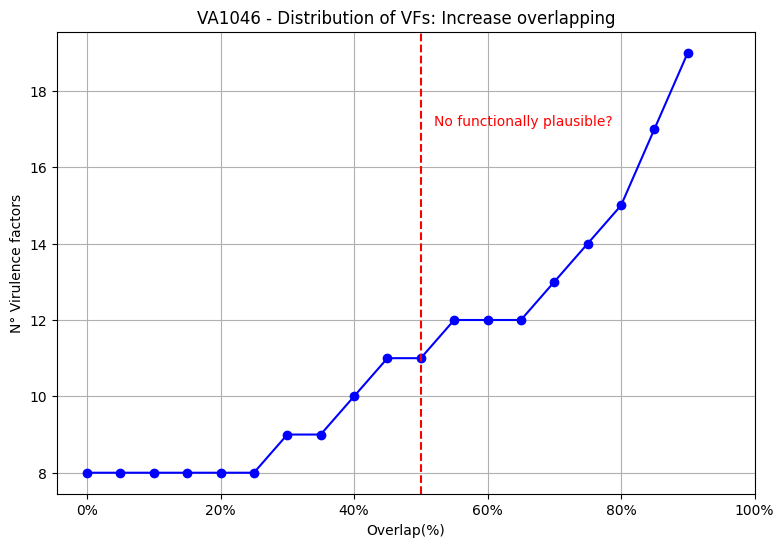

In [8]:
plt.figure(figsize=(9, 6))
plt.plot(overlap_values, num_hits, marker='o', linestyle='-', color='b')
plt.xlabel('Overlap(%)')
plt.ylabel('N° Virulence factors')
plt.title('VA1046 - Distribution of VFs: Increase overlapping')
plt.grid(True)
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1],
           ['0%', '20%', '40%', '60%', '80%', '100%'])
plt.axvline(x=0.5, color='red', linestyle='--')
plt.text(0.52, max(num_hits)*0.9, "No functionally plausible?", color='red')
plt.show()

__See VF-matches in samples__

In [26]:
N12s_VFDB = pl.read_csv('/home/npilquinao/BEM-ISP/group_storage/diamond/output/filtering/N12s_VFDB.tsv',
                          separator='\t',
                          has_header=True)

N12s_VFDB = N12s_VFDB.select("qseqid","VFG","pident",
                             "Virulence_Factor","Virulence_Factor_Category")

display(N12s_VFDB.head(10))

for VF in N12s_VFDB["Virulence_Factor"].unique():
    print(VF)

qseqid,VFG,pident,Virulence_Factor,Virulence_Factor_Category
str,str,f64,str,str
"""cVA1046""","""VFG000362""",99.7,"""Yersiniabactin-VF0136""","""Nutritional_Metabolic_factor-V…"
"""cVA1046""","""VFG000363""",99.7,"""Yersiniabactin-VF0136""","""Nutritional_Metabolic_factor-V…"
"""pVA1046-199""","""VFG034652""",72.3,"""Ibes-VF0237""","""Invasion-VFC0083"""
"""pVA1046-199""","""VFG031407""",44.6,"""Copper_exporter-VF0849""","""Nutritional_Metabolic_factor-V…"
"""pVA1046-41""","""VFG012636""",45.9,"""TTSS-VF0118""","""Effector_delivery_system-VFC00…"
"""pVA1046-41""","""VFG000088""",35.4,"""TCP-VF0126""","""Adherence-VFC0001"""
"""pVA1046-46""","""VFG011116""",34.8,"""Ptl_type_IV_secretion_system-V…","""Effector_delivery_system-VFC00…"
"""pVA1046-46""","""VFG011097""",32.4,"""Ptl_type_IV_secretion_system-V…","""Effector_delivery_system-VFC00…"
"""cVA1101""","""VFG036031""",43.1,"""Contact_dependent_inhibition_C…","""Effector_delivery_system-VFC00…"


Aerobactin-VF0565
Polar_flagella-VF0473
T6SS_III-VF0784
Yersiniabactin-VF0136
TTSS-VF0118
Bcf-VF0950
TCP-VF0126
T6SS_II-VF0783
Dot_Icm_T4SS-VF0503
Contact_dependent_inhibition_CDI_system-VF1131
PlcR_PapR_quorum_sensing-VF0660
Ybt-VF0564
PhoP-VF0286
Ibes-VF0237
MymA_operon-VF0840
Type_IV_pili-VF0082
Yersiniabactin_siderophore-VF1115
Colibactin-VF0573
Dot_Icm-VF0156
Adhesive_fimbriae-VF0213
AcrAB-VF0568
Ptl_type_IV_secretion_system-VF0686
Phosphoethanolamine_modification-VF0899
BFP-VF0174
Pld-VF0491
ClpC-VF0072
Sal-VF0563
T6SS-VF0569
TFP-VF1334
Ent-VF0562
Cya-VF0028
Trw_type_IV_secretion_system-VF0372
Copper_exporter-VF0849
